<a href="https://colab.research.google.com/github/AAKANKSHA123-123/MY_PROJECTS_PRAC/blob/main/Kaggle_Advance_Houseprice_prediction_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filename = 'https://raw.githubusercontent.com/krishnaik06/Pytorch-Tutorial/master/houseprice.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df=pd.read_csv(filename,usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [6]:
df.shape

(1201, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [8]:
for i in df.columns:
  print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [9]:
import datetime
datetime.datetime.now().year

2021

In [10]:
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,18
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,45
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,20
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,106
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,21


In [12]:
df.drop("YearBuilt",axis=1,inplace=True)

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [14]:
cat_features = ["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalePrice"

In [16]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [17]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [18]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [19]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]=lbl_encoders[feature].fit_transform(df[feature])


In [20]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,22
1456,0,3,85.0,13175,1,3,2073,0,210000,43
1457,6,3,66.0,9042,1,3,1188,1152,266500,80
1458,0,3,68.0,9717,1,3,1078,0,142125,71


In [21]:
import numpy as np


In [22]:
####Stacking and converting Into Tensors
cat_features = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [23]:
cat_features.shape

(1201, 4)

In [24]:
####Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [25]:
cat_features.shape

torch.Size([1201, 4])

In [26]:
###create continous variable
cont_features=[]
for i in df.columns:
  if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
       pass
  else:
    cont_features.append(i)    


In [27]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [28]:
###Stacking continous variable into Tensor
cont_values = np.stack([df[i].values for i in cont_features],axis=1)
cont_values = torch.tensor(cont_values,dtype=torch.float)

In [29]:
cont_values.dtype

torch.float32

In [30]:
y = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)

In [31]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [33]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [34]:
len(df['MSSubClass'].unique())

15

 **EMBEDDING SIZE FOR CATEGORICAL COLUMNS**

In [35]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]

In [36]:
cat_dims

[15, 5, 2, 4]

In [37]:
###Output dimension should be set based on input dimension(min(50,feature dimension/2))
embedding_dim = [(x,min(50,(x+1)//2)) for x in cat_dims]

In [38]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [40]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [41]:
cat_features.shape

torch.Size([1201, 4])

In [42]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [43]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))

In [44]:
embedding_val

[tensor([[-0.2544,  1.2148,  0.7720,  ..., -0.3837, -1.5547,  0.2135],
         [-0.8857,  0.0156,  0.5427,  ..., -1.4277, -0.9243, -0.0050],
         [-0.2544,  1.2148,  0.7720,  ..., -0.3837, -1.5547,  0.2135],
         ...,
         [-0.6608, -0.5022, -0.2172,  ...,  0.3425, -2.1917, -2.6593],
         [-0.8857,  0.0156,  0.5427,  ..., -1.4277, -0.9243, -0.0050],
         [-0.8857,  0.0156,  0.5427,  ..., -1.4277, -0.9243, -0.0050]],
        grad_fn=<EmbeddingBackward0>), tensor([[-0.9896,  0.5624, -1.2286],
         [-0.9896,  0.5624, -1.2286],
         [-0.9896,  0.5624, -1.2286],
         ...,
         [-0.9896,  0.5624, -1.2286],
         [-0.9896,  0.5624, -1.2286],
         [-0.9896,  0.5624, -1.2286]], grad_fn=<EmbeddingBackward0>), tensor([[0.1388],
         [0.1388],
         [0.1388],
         ...,
         [0.1388],
         [0.1388],
         [0.1388]], grad_fn=<EmbeddingBackward0>), tensor([[-0.3866,  0.4588],
         [-0.3866,  0.4588],
         [-1.4364, -2.4821],
  

In [45]:
z = torch.cat(embedding_val,1)
z

tensor([[-0.2544,  1.2148,  0.7720,  ...,  0.1388, -0.3866,  0.4588],
        [-0.8857,  0.0156,  0.5427,  ...,  0.1388, -0.3866,  0.4588],
        [-0.2544,  1.2148,  0.7720,  ...,  0.1388, -1.4364, -2.4821],
        ...,
        [-0.6608, -0.5022, -0.2172,  ...,  0.1388, -0.3866,  0.4588],
        [-0.8857,  0.0156,  0.5427,  ...,  0.1388, -0.3866,  0.4588],
        [-0.8857,  0.0156,  0.5427,  ...,  0.1388, -0.3866,  0.4588]],
       grad_fn=<CatBackward0>)

In [46]:
dropout = nn.Dropout(.4)

In [47]:
final_embed= dropout(z)
final_embed

tensor([[-0.4241,  0.0000,  0.0000,  ...,  0.2313, -0.6443,  0.7646],
        [-0.0000,  0.0000,  0.9044,  ...,  0.0000, -0.0000,  0.7646],
        [-0.4241,  0.0000,  0.0000,  ...,  0.0000, -2.3940, -4.1369],
        ...,
        [-1.1013, -0.8370, -0.0000,  ...,  0.2313, -0.0000,  0.7646],
        [-1.4762,  0.0000,  0.9044,  ...,  0.2313, -0.0000,  0.7646],
        [-0.0000,  0.0260,  0.9044,  ...,  0.2313, -0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

In [48]:
import torch
import torch.nn.functional as F
import torch.nn as nn
class FeedForwardNN(nn.Module):
  def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
      super().__init__()
      self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
      self.emb_drop = nn.Dropout(p)
      self.bn_cont = nn.BatchNorm1d(n_cont)

      layerlist = []
      n_emb = sum((out for inp,out in embedding_dim))
      n_in = n_emb + n_cont

      for i in layers:
        layerlist.append(nn.Linear(n_in,i))
        layerlist.append(nn.ReLU(inplace=True))
        layerlist.append(nn.BatchNorm1d(i))
        layerlist.append(nn.Dropout(p))
        n_in = i
      layerlist.append(nn.Linear(layers[-1],out_sz))
      self.layers = nn.Sequential(*layerlist)

  def forward(self,x_cat,x_cont):
    embeddings=[]
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings,1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x,x_cont],1)
    x = self.layers(x)
    return x      


In [49]:
len(cont_features)

5

In [50]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [51]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

**Define loss and optimizer**

In [52]:
loss_function = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [53]:
df.shape

(1201, 10)

In [54]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [55]:
batch_size = 1200
test_size = int(batch_size*0.15)
train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]


In [56]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [57]:
epochs=5000
final_losses=[]
for i in range(epochs):
  i = i+1
  y_pred = model(train_categorical,train_cont)
  loss = torch.sqrt(loss_function(y_pred,y_train))
  final_losses.append(loss)
  if i%10==1:
    print("Epoch number : {} and the loss : {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()  

Epoch number : 1 and the loss : 200496.75
Epoch number : 11 and the loss : 200493.46875
Epoch number : 21 and the loss : 200489.140625
Epoch number : 31 and the loss : 200482.640625
Epoch number : 41 and the loss : 200473.25
Epoch number : 51 and the loss : 200461.375
Epoch number : 61 and the loss : 200446.4375
Epoch number : 71 and the loss : 200429.421875
Epoch number : 81 and the loss : 200407.953125
Epoch number : 91 and the loss : 200383.421875
Epoch number : 101 and the loss : 200355.21875
Epoch number : 111 and the loss : 200322.0625
Epoch number : 121 and the loss : 200291.46875
Epoch number : 131 and the loss : 200252.140625
Epoch number : 141 and the loss : 200206.578125
Epoch number : 151 and the loss : 200161.84375
Epoch number : 161 and the loss : 200112.125
Epoch number : 171 and the loss : 200058.75
Epoch number : 181 and the loss : 200006.25
Epoch number : 191 and the loss : 199947.078125
Epoch number : 201 and the loss : 199881.296875
Epoch number : 211 and the loss :

Text(0.5, 0, 'epoch')

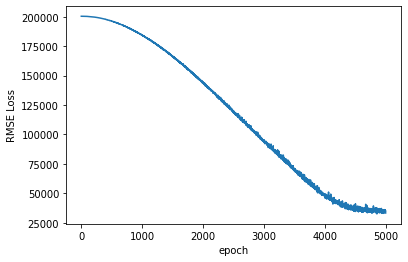

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [61]:
###Validate the test data
y_pred = ""
with torch.no_grad():
  y_pred=model(test_categorical,test_cont)
  loss= torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))  

RMSE: 42128.36328125


In [62]:
data_verify = pd.DataFrame(y_test.tolist(),columns=["Test"])

In [63]:
data_predicted = pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [64]:
data_predicted

,Prediction
0,100360.554688
1,198613.906250
2,125908.046875
3,202358.281250
4,221493.359375
5,202849.312500
6,151999.625000
7,289870.437500
8,160965.890625
9,396116.781250


In [65]:
final_output = pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,100360.554688,29639.445312
1,138887.0,198613.906250,-59726.906250
2,175500.0,125908.046875,49591.953125
3,195000.0,202358.281250,-7358.281250
4,142500.0,221493.359375,-78993.359375


In [66]:
torch.save(model,'HouseWeights.pt')

In [67]:
###Loading the saved model
embs_size = [(15,8),(5,3),(2,1),(4,2)]
model1 = FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [70]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [71]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [72]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)